# Импорт данных

In [1]:
import pandas as pd
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/sport_games/nhldraft.csv')
df

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,...,points,plus_minus,penalties_minutes,goalie_games_played,goalie_wins,goalie_losses,goalie_ties_overtime,save_percentage,goals_against_average,point_shares
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),...,329.0,-4.0,294.0,NaN,NaN,NaN,NaN,NaN,NaN,53.7
12246,12247,1963,18,Montreal Canadiens,Glen Shirton,CA,D,NaN,NaN,Port Colborne Midgets (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12247,12248,1963,19,Boston Bruins,Jim Blair,CA,F,NaN,NaN,Georgetown Midgets (OHA-Jr.),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12248,12249,1963,20,New York Rangers,Campbell Alleson,CA,D,NaN,NaN,Portage la Prairie Jr. (),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['id', 'year', 'overall_pick', 'team', 'player', 'nationality',
       'position', 'age', 'to_year', 'amateur_team', 'games_played', 'goals',
       'assists', 'points', 'plus_minus', 'penalties_minutes',
       'goalie_games_played', 'goalie_wins', 'goalie_losses',
       'goalie_ties_overtime', 'save_percentage', 'goals_against_average',
       'point_shares'],
      dtype='object')

# Выбор данных

overall_pick это под каким номером игрока выбрала команда на драфте, чем раньше игрока выбрали, тем больше надежд и прогнозов, на то что он  будет отличным игроком

position на позиции особо внимания не стоит образщать, но все таки D - это защитник, C - центральный нападающий, RF - правый нападающий, LF - левый нападающий

to_year - год до которого играет игрок, но там все дейсвтующие в таблице

games_played - сколько игр сыграл игрок 

goals - количество голов игрока за все игры 

assists - количество передач после которых был забит гол 

points -  голы + передачи 

plus_minus -  это показатель полезности , когда игрок находится на поле и забивают гол , то +1, если когда он на поле и его команда пропускает то -1, и так считают общую суумму

In [4]:
df_select = df[['year', 'overall_pick',  'nationality',
       'position', 'age',  'games_played', 'goals',
       'assists', 'points', 'plus_minus']]

df_select

,year,overall_pick,nationality,position,age,games_played,goals,assists,points,plus_minus
0,2022,1,SK,LW,18.0,NaN,NaN,NaN,NaN,NaN
1,2022,2,SK,D,18.0,NaN,NaN,NaN,NaN,NaN
2,2022,3,US,C,18.0,NaN,NaN,NaN,NaN,NaN
3,2022,4,CA,C,18.0,NaN,NaN,NaN,NaN,NaN
4,2022,5,SE,LW,18.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12245,1963,17,CA,D,16.0,604.0,82.0,247.0,329.0,-4.0
12246,1963,18,CA,D,NaN,NaN,NaN,NaN,NaN,NaN
12247,1963,19,CA,F,NaN,NaN,NaN,NaN,NaN,NaN
12248,1963,20,CA,D,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['position'].unique()

array(['LW', 'D', 'C', 'RW', 'G', 'W', 'C; LW', 'C/LW', 'C RW', 'C/RW',
       'L/RW', nan, 'F', 'C/W', 'Centr', 'D/W', 'LW/C', 'C/D', 'RW/C',
       'D/LW', 'LW/D', 'RW/D', 'D/C', 'D/RW', 'C / R'], dtype=object)

https://outsidergaming.com/nhl-positions-explained-everything-you-need-to-know/

2 Center (C)

3 Right Wing (RW)

4 Left Wing (LW)

5 Defensemen (LD and RD)

6 Goaltenders (G)

9 Enforcers (forwards)

10 Grinders

11 Two-Way (forwards)

12 Playmakers

13 Power

14 Snipers

15 Defensive

16 Two-Way (defenseman)

17 Offensive (defenseman)

18 Enforcer (defenseman)

19 Butterfly (goalie)

20 Standup (goalie)

21 Hybrid (goalies)

In [5]:
df['nationality'].unique()

array(['SK', 'US', 'CA', 'SE', 'CZ', 'AT', 'RU', 'FI', 'CH', 'DE', 'LV',
       'PL', 'BY', 'GB', 'KZ', 'NO', 'UA', 'UZ', 'DK', 'AU', 'TH', 'JM',
       'FR', 'SI', 'BE', 'NL', 'CN', 'LT', nan, 'IT', 'NG', 'EE', 'JP',
       'ME', 'HU', 'YU', 'BS', 'BR', 'TZ', 'BN', 'KR', 'ZA', 'SU', 'HT',
       'TW', 'PY', 'VE'], dtype=object)

# Препроцессинг

In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          12250 non-null  int64  
 1   overall_pick  12250 non-null  int64  
 2   nationality   12246 non-null  object 
 3   position      12223 non-null  object 
 4   age           8291 non-null   float64
 5   games_played  5246 non-null   float64
 6   goals         5246 non-null   float64
 7   assists       5246 non-null   float64
 8   points        5246 non-null   float64
 9   plus_minus    5234 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 957.2+ KB


**Удаляем все пропуски**

In [6]:
df_select = df_select.dropna()

In [7]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 225 to 12249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5234 non-null   int64  
 1   overall_pick  5234 non-null   int64  
 2   nationality   5234 non-null   object 
 3   position      5234 non-null   object 
 4   age           5234 non-null   float64
 5   games_played  5234 non-null   float64
 6   goals         5234 non-null   float64
 7   assists       5234 non-null   float64
 8   points        5234 non-null   float64
 9   plus_minus    5234 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 449.8+ KB


In [8]:
df_select.describe()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
count,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000,5234.000000
mean,1994.818877,82.828429,18.824608,306.079480,50.975545,85.232518,136.207872,-2.282767
std,13.974495,67.694568,1.490590,346.840952,94.136725,144.354846,232.997653,51.247311
min,1963.000000,1.000000,16.000000,1.000000,0.000000,0.000000,0.000000,-257.000000
25%,1983.000000,27.000000,18.000000,26.000000,0.000000,2.000000,3.000000,-17.000000
50%,1995.000000,64.000000,18.000000,152.500000,9.000000,19.000000,29.000000,-2.000000
75%,2007.000000,126.000000,19.000000,523.750000,56.000000,107.000000,166.000000,1.000000
max,2021.000000,291.000000,37.000000,1779.000000,780.000000,1249.000000,1921.000000,722.000000


**Удаляем вратарей**

In [9]:
df_active = df_select[ df_select['position']  != 'G']

df_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 225 to 12249
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4756 non-null   int64  
 1   overall_pick  4756 non-null   int64  
 2   nationality   4756 non-null   object 
 3   position      4756 non-null   object 
 4   age           4756 non-null   float64
 5   games_played  4756 non-null   float64
 6   goals         4756 non-null   float64
 7   assists       4756 non-null   float64
 8   points        4756 non-null   float64
 9   plus_minus    4756 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 408.7+ KB


In [10]:
df_active.describe()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
count,4756.000000,4756.00000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000,4756.000000
mean,1994.814760,81.29878,18.813288,318.167998,56.096089,93.316442,149.412532,-2.512195
std,14.033397,67.72708,1.489268,354.170256,97.290225,149.035948,240.478360,53.756115
min,1963.000000,1.00000,16.000000,1.000000,0.000000,0.000000,0.000000,-257.000000
25%,1983.000000,25.00000,18.000000,27.750000,1.000000,3.000000,5.000000,-19.000000
50%,1995.000000,62.00000,18.000000,160.500000,13.000000,25.000000,40.000000,-4.000000
75%,2007.000000,124.00000,19.000000,545.250000,66.000000,123.000000,194.000000,2.000000
max,2021.000000,291.00000,37.000000,1779.000000,780.000000,1249.000000,1921.000000,722.000000


**Смотрим распределение**

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


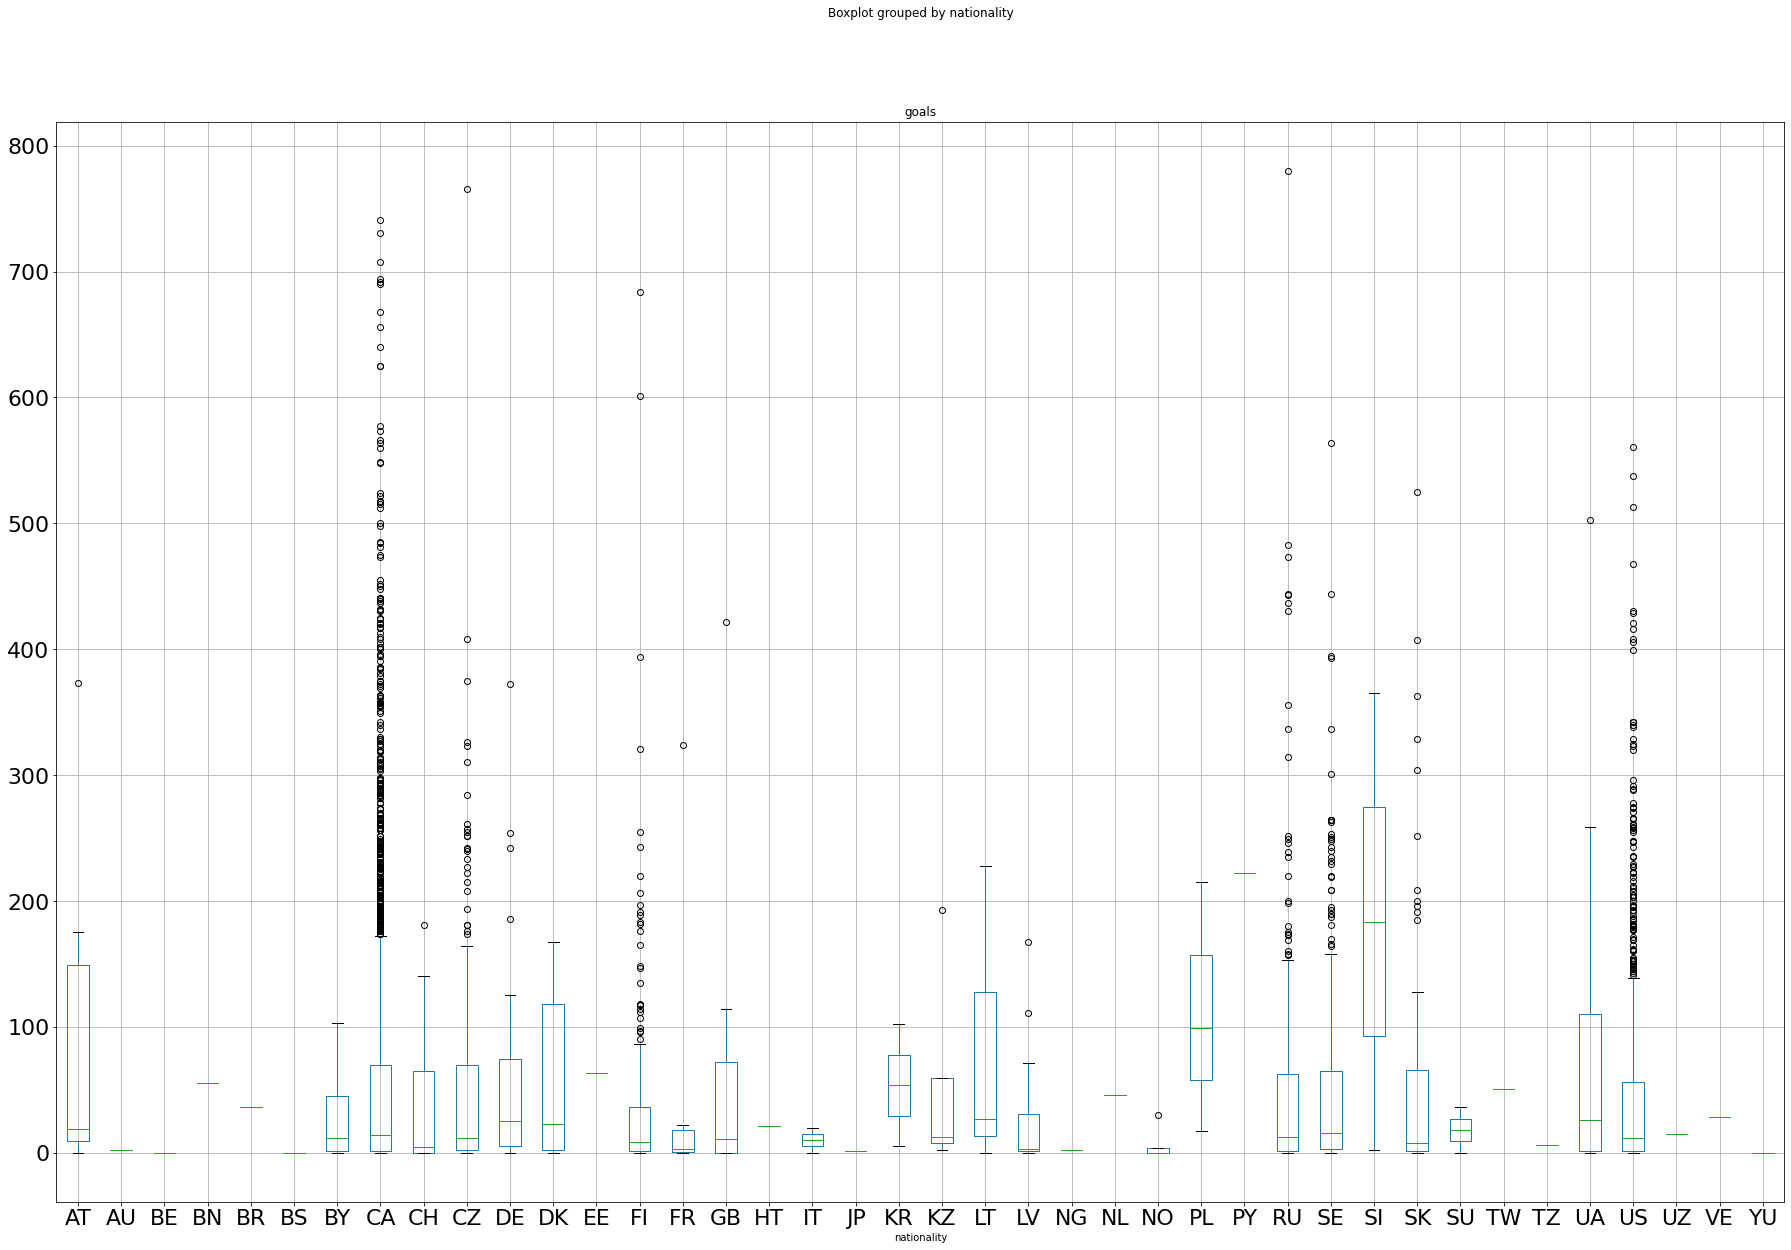

In [29]:
df_active.boxplot(by ='nationality', column =['goals'], figsize= (30,20), fontsize= 22)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


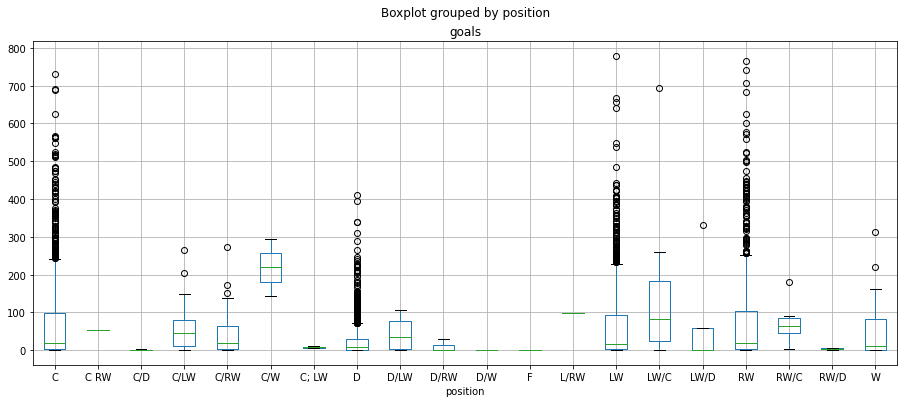

In [18]:
df_active.boxplot(by ='position', column =['goals'], figsize= (15,6))

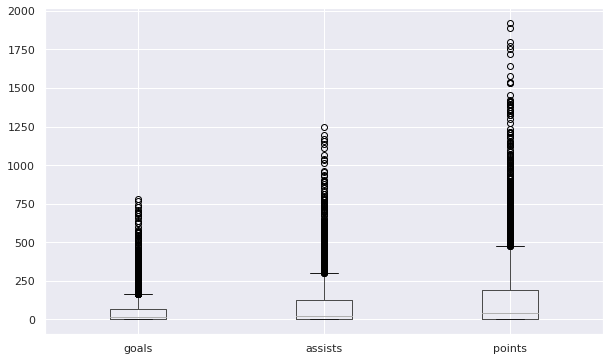

In [39]:
df_active.boxplot(column=['goals', 'assists', 'points'], figsize= (10,6))

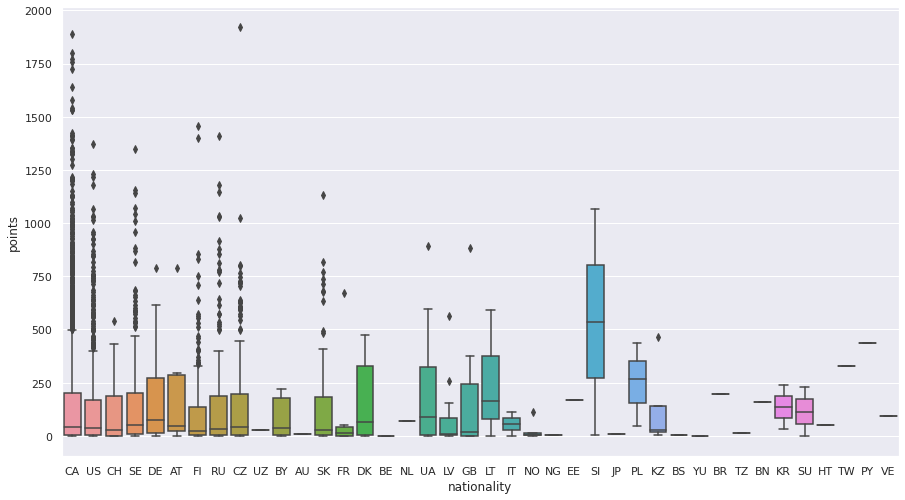

In [37]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(x = 'nationality', y = 'points', data = df_active)

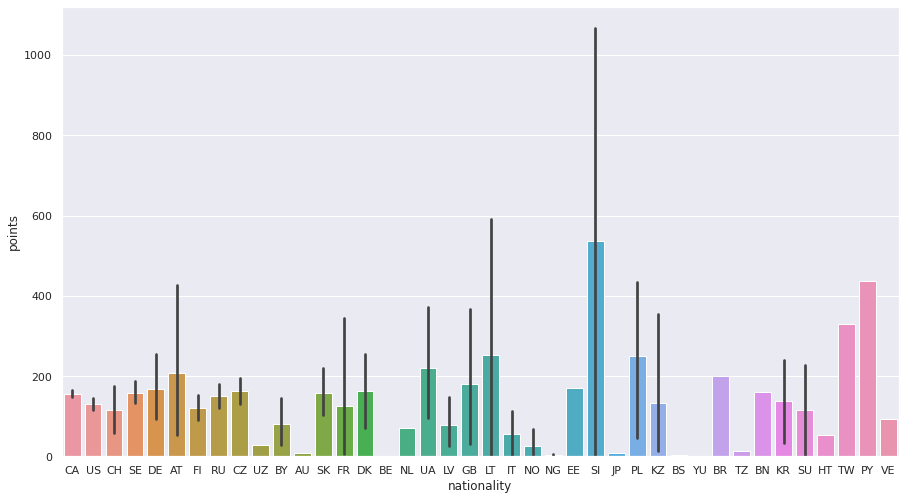

In [38]:
sns.barplot(x = 'nationality', y = 'points', data = df_active)

# Корреляции

In [33]:
df_active.corr()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
year,1.000000,0.073651,-0.237826,-0.146262,-0.144117,-0.155989,-0.154980,-0.005363
overall_pick,0.073651,1.000000,0.279373,-0.248591,-0.240529,-0.247844,-0.250911,-0.013403
age,-0.237826,0.279373,1.000000,-0.079667,-0.056324,-0.054129,-0.056333,0.016203
games_played,-0.146262,-0.248591,-0.079667,1.000000,0.795871,0.872004,0.862408,0.224476
goals,-0.144117,-0.240529,-0.056324,0.795871,1.000000,0.901835,0.963480,0.279232
assists,-0.155989,-0.247844,-0.054129,0.872004,0.901835,1.000000,0.984603,0.360106
points,-0.154980,-0.250911,-0.056333,0.862408,0.963480,0.984603,1.000000,0.336143
plus_minus,-0.005363,-0.013403,0.016203,0.224476,0.279232,0.360106,0.336143,1.000000


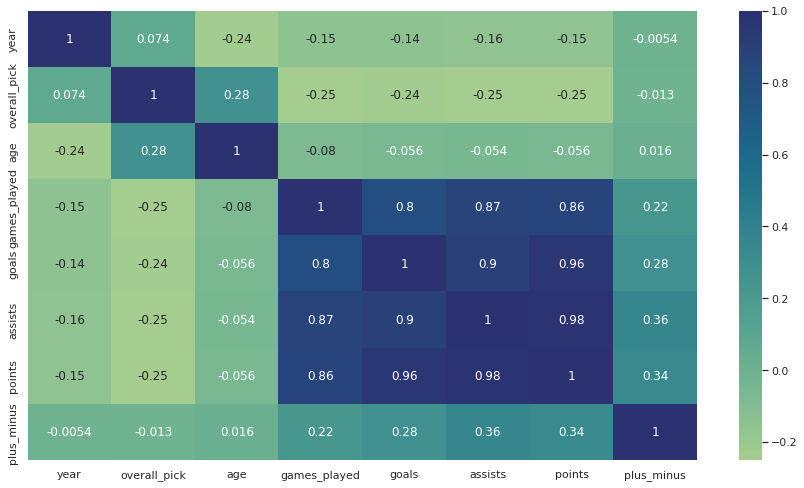

In [76]:
sns.heatmap(df_active.corr(), annot=True, cmap="crest")

# Лог регрессия

In [40]:
X = df_active.drop(['nationality', 'position'], axis = 1)
Y = df_active['nationality']

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 225 to 12249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          4756 non-null   int64  
 1   overall_pick  4756 non-null   int64  
 2   age           4756 non-null   float64
 3   games_played  4756 non-null   float64
 4   goals         4756 non-null   float64
 5   assists       4756 non-null   float64
 6   points        4756 non-null   float64
 7   plus_minus    4756 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 463.4 KB


**Требуется нормализация**

In [42]:
eval_state = pd.DataFrame(columns=['random_state', 'value'])

for i in range(15):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    #print("{}: {}".format(i, model.score(X_test, Y_test)))
    eval_state.loc[len(eval_state)]=[i, model.score(X_test, Y_test)]


eval_state

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,random_state,value
0,0.0,0.594254
1,1.0,0.563420
2,2.0,0.555711
3,3.0,0.563420
4,4.0,0.575333
5,5.0,0.583742
6,6.0,0.575333
7,7.0,0.578136
8,8.0,0.583742
9,9.0,0.589348


**Нормализуем**

In [43]:
eval_state = pd.DataFrame(columns=['random_state', 'value'])

for i in range(15):
    X, Y = make_classification(random_state=i)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=i)
    pipe = make_pipeline(StandardScaler(), LogisticRegression())
    pipe.fit(X_train, y_train)  # apply scaling on training data

    #pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.
    
    eval_state.loc[len(eval_state)]=[i, pipe.score(X_test, y_test)]


eval_state

,random_state,value
0,0.0,0.90
1,1.0,0.90
2,2.0,0.90
3,3.0,0.70
4,4.0,0.90
5,5.0,0.90
6,6.0,0.90
7,7.0,0.95
8,8.0,0.90
9,9.0,0.90


**Пробуем увеличить количество итераций**

In [45]:
a = df_active.drop(['overall_pick','nationality', 'position', 'year', 'age'], axis = 1)
b = df_active['nationality']

In [46]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 225 to 12249
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   games_played  4756 non-null   float64
 1   goals         4756 non-null   float64
 2   assists       4756 non-null   float64
 3   points        4756 non-null   float64
 4   plus_minus    4756 non-null   float64
dtypes: float64(5)
memory usage: 352.0 KB


In [47]:
model = LogisticRegression(max_iter=100000000, random_state = 42)
model.fit(a, b)
model.score(a, b)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.575273338940286

# Линейная регрессия

In [48]:

import statsmodels.formula.api as smf

model = smf.ols('points ~ assists', data = df_active)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 points   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.508e+05
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:06:43   Log-Likelihood:                -24529.
No. Observations:                4756   AIC:                         4.906e+04
Df Residuals:                    4754   BIC:                         4.907e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1593      0.719      1.612      0.1

In [32]:

import statsmodels.formula.api as smf

model = smf.ols('overall_pick ~ points', data = df_active)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           overall_pick   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     319.4
Date:                Sun, 30 Oct 2022   Prob (F-statistic):           3.43e-69
Time:                        12:50:40   Log-Likelihood:                -26642.
No. Observations:                4756   AIC:                         5.329e+04
Df Residuals:                    4754   BIC:                         5.330e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     91.8571      1.119     82.063      0.0

# Выделяем страны

In [49]:
df_rus = df_active[df_active['nationality']  == 'RU']
df_rus

,year,overall_pick,nationality,position,age,games_played,goals,assists,points,plus_minus
468,2020,21,RU,RW,19.0,62.0,7.0,7.0,14.0,-27.0
673,2019,10,RU,RW,18.0,79.0,14.0,12.0,26.0,7.0
711,2019,48,RU,D,18.0,1.0,0.0,0.0,0.0,-2.0
724,2019,61,RU,D,18.0,5.0,1.0,1.0,2.0,-2.0
742,2019,79,RU,LW,18.0,2.0,0.0,0.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...
8917,1986,238,RU,LW,26.0,61.0,11.0,23.0,34.0,-5.0
9145,1985,214,RU,C,24.0,921.0,169.0,475.0,644.0,104.0
9408,1984,225,RU,D,18.0,161.0,21.0,48.0,69.0,10.0
9807,1982,132,RU,C,27.0,3.0,1.0,0.0,1.0,1.0


In [50]:
df_rus.describe()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,2000.428571,90.031250,19.767857,272.415179,57.102679,92.022321,149.125000,5.629464
std,9.778456,75.143712,2.847333,318.189979,105.626991,146.991762,246.123092,42.842094
min,1978.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,-146.000000
25%,1992.000000,27.000000,18.000000,29.500000,1.750000,3.000000,5.000000,-9.000000
50%,1998.000000,67.000000,18.000000,127.000000,12.500000,20.500000,33.500000,-1.500000
75%,2009.250000,132.750000,20.000000,485.500000,62.500000,126.500000,188.500000,7.250000
max,2020.000000,279.000000,30.000000,1316.000000,780.000000,702.000000,1410.000000,261.000000


In [52]:
df_not_ru = df_active[df_active['nationality']  != 'RU']

In [53]:
df_not_ru.describe()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
count,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000,4532.000000
mean,1994.537290,80.867167,18.766108,320.429391,56.046337,93.380406,149.426743,-2.914607
std,14.153841,67.319111,1.371597,355.733443,96.871905,149.151975,240.223679,54.210759
min,1963.000000,1.000000,16.000000,1.000000,0.000000,0.000000,0.000000,-257.000000
25%,1982.000000,25.000000,18.000000,27.000000,1.000000,3.000000,5.000000,-20.000000
50%,1995.000000,62.000000,18.000000,164.000000,13.000000,26.000000,40.000000,-4.000000
75%,2007.000000,123.000000,19.000000,548.250000,66.000000,122.000000,194.000000,2.000000
max,2021.000000,291.000000,37.000000,1779.000000,766.000000,1249.000000,1921.000000,722.000000


In [54]:
df_ca = df_active[df_active['nationality']  == 'CA']
df_ca.describe()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
count,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000
mean,1991.325301,72.959109,18.657904,332.663381,59.376415,96.353049,155.729463,-4.318364
std,14.270541,63.851589,0.880031,364.029877,102.469841,154.764759,251.650479,59.235636
min,1963.000000,1.000000,16.000000,1.000000,0.000000,0.000000,0.000000,-257.000000
25%,1979.000000,21.000000,18.000000,29.000000,1.000000,3.000000,5.000000,-22.000000
50%,1990.000000,54.000000,18.000000,175.000000,14.000000,27.000000,42.000000,-4.000000
75%,2003.000000,109.000000,19.000000,570.000000,70.000000,125.000000,202.500000,1.000000
max,2021.000000,290.000000,24.000000,1779.000000,741.000000,1249.000000,1887.000000,722.000000


In [55]:
df_us = df_active[df_active['nationality']  == 'US']
df_us.describe()

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,1998.305682,89.389773,18.590909,299.951136,48.235227,82.160227,130.395455,-4.802273
std,13.524796,65.312161,0.849766,339.272468,82.357999,131.756275,207.684971,42.939378
min,1968.000000,1.000000,17.000000,1.000000,0.000000,0.000000,0.000000,-148.000000
25%,1987.000000,33.000000,18.000000,25.000000,1.000000,3.000000,4.000000,-20.000000
50%,2001.000000,75.000000,18.000000,152.500000,12.000000,24.000000,37.000000,-4.000000
75%,2010.000000,135.000000,19.000000,483.000000,56.500000,103.250000,166.500000,1.000000
max,2021.000000,282.000000,28.000000,1651.000000,561.000000,894.000000,1374.000000,400.000000


In [61]:
df_active.groupby(['nationality']).mean().round(1)

,year,overall_pick,age,games_played,goals,assists,points,plus_minus
nationality,,,,,,,,
AT,2009.0,50.6,19.6,364.1,101.3,105.9,207.1,10.4
AU,2019.0,95.0,18.0,24.0,2.0,6.0,8.0,0.0
BE,2016.0,81.0,18.0,2.0,0.0,0.0,0.0,-2.0
BN,1996.0,223.0,19.0,951.0,55.0,105.0,160.0,-82.0
BR,1998.0,19.0,18.0,1089.0,36.0,163.0,199.0,30.0
BS,2002.0,182.0,18.0,31.0,0.0,2.0,2.0,-1.0
BY,2007.4,94.2,19.1,223.3,30.1,50.8,80.9,-4.9
CA,1991.3,73.0,18.7,332.7,59.4,96.4,155.7,-4.3
CH,2008.9,94.6,19.1,236.7,38.1,76.1,114.2,-7.5


In [63]:
df_active.groupby(['nationality', 'year']).mean().round(1)

overall_pick   age  games_played  goals  assists  points  \
nationality year                                                             
AT          2002         237.0  27.0          35.0    4.0      5.0     9.0   
            2003           5.0  19.0        1029.0  373.0    416.0   789.0   
            2006          26.5  18.5         411.5   95.0     61.0   156.0   
            2013          25.0  18.0         330.0   71.0     99.0   170.0   
            2020           9.0  18.0           2.0    0.0      0.0     0.0   
...                        ...   ...           ...    ...      ...     ...   
US          2020          38.0  18.0           8.0    0.0      5.0     5.0   
            2021           7.0  18.0          44.5    9.5     10.5    20.0   
UZ          2019          33.0  18.0          81.0   15.0     13.0    28.0   
VE          1974          10.0  20.0         420.0   28.0     64.0    92.0   
YU          1999         234.0  19.0           3.0    0.0      0.0     0.0   

                  plus_minus  
nationality year              
AT          2002        -2.0  
            2003         5.0  
            2006         4.5  
            2013        31.0  
            2020        -1.0  
...                      ...  
US          2020        -1.0  
            2021       -11.5  
UZ          2019        -4.0  
VE          1974        47.0  
YU          1999        -1.0  

[447 rows x 7 columns]

# Работаем с категориальной переменной one (hot encoding)

In [65]:
one_hot = pd.get_dummies(df_active['position'])
one_hot

,C,C RW,C/D,C/LW,C/RW,C/W,C; LW,D,D/LW,D/RW,D/W,F,L/RW,LW,LW/C,LW/D,RW,RW/C,RW/D,W
225,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
226,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
227,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
12230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12234,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12245,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df_onehot = df_active.join(one_hot)
df_onehot = df_onehot.drop('position', axis = 1)
df_onehot

,year,overall_pick,nationality,age,games_played,goals,assists,points,plus_minus,C,...,D/W,F,L/RW,LW,LW/C,LW/D,RW,RW/C,RW/D,W
225,2021,1,CA,18.0,8.0,2.0,1.0,3.0,3.0,0,...,0,0,0,0,0,0,0,0,0,0
226,2021,2,US,18.0,10.0,3.0,6.0,9.0,-1.0,1,...,0,0,0,0,0,0,0,0,0,0
227,2021,3,CH,18.0,9.0,2.0,1.0,3.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
229,2021,5,CA,18.0,9.0,0.0,3.0,3.0,2.0,1,...,0,0,0,0,0,0,0,0,0,0
231,2021,7,SE,18.0,9.0,0.0,4.0,4.0,-3.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,1963,1,CA,16.0,748.0,116.0,169.0,285.0,-6.0,0,...,0,0,0,1,0,0,0,0,0,0
12230,1963,2,CA,16.0,883.0,288.0,485.0,773.0,234.0,1,...,0,0,0,0,0,0,0,0,0,0
12234,1963,6,CA,16.0,955.0,214.0,392.0,606.0,-119.0,1,...,0,0,0,0,0,0,0,0,0,0
12245,1963,17,CA,16.0,604.0,82.0,247.0,329.0,-4.0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
model = LogisticRegression()

In [68]:
X = df_onehot.drop('nationality', axis = 1)

y = df_active['nationality']

In [69]:
model.fit(X, y)
model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5750630782169891

In [71]:
X, Y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data

0.9

In [73]:
X, Y = make_classification(random_state=0)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X, Y)  # apply scaling on training data

pipe.score(X, Y)  # apply scaling on testing data, without leaking training data

0.96

In [78]:
X = df_onehot.drop(['nationality', 'points'], axis = 1)

y = df_active['nationality']

In [79]:
model.fit(X, y)
model.score(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.5754835996635829

In [81]:
X, Y = make_classification(random_state=0)
pipe.fit(X_train, y_train)  # apply scaling on training data
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X, Y)  # apply scaling on training data

pipe.score(X, Y)  # apply scaling on testing data, without leaking training data

0.96

In [ ]:
df.drop(labels=['penalties_minutes', 'goalie_games_played', 'goalie_wins', 'goalie_losses','goalie_ties_overtime','save_percentage','goals_against_average','point_shares'], axis=1, inplace=True)
df

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,games_played,goals,assists,points,plus_minus
0,1,2022,1,Montreal Canadiens,Juraj Slafkovsky,SK,LW,18.0,NaN,TPS (Finland),NaN,NaN,NaN,NaN,NaN
1,2,2022,2,New Jersey Devils,Simon Nemec,SK,D,18.0,NaN,HK Nitra (Slovakia),NaN,NaN,NaN,NaN,NaN
2,3,2022,3,Arizona Coyotes,Logan Cooley,US,C,18.0,NaN,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN,NaN,NaN
3,4,2022,4,Seattle Kraken,Shane Wright,CA,C,18.0,NaN,Kingston Frontenacs (OHL),NaN,NaN,NaN,NaN,NaN
4,5,2022,5,Philadelphia Flyers,Cutter Gauthier,SE,LW,18.0,NaN,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),604.0,82.0,247.0,329.0,-4.0
12246,12247,1963,18,Montreal Canadiens,Glen Shirton,CA,D,NaN,NaN,Port Colborne Midgets (),NaN,NaN,NaN,NaN,NaN
12247,12248,1963,19,Boston Bruins,Jim Blair,CA,F,NaN,NaN,Georgetown Midgets (OHA-Jr.),NaN,NaN,NaN,NaN,NaN
12248,12249,1963,20,New York Rangers,Campbell Alleson,CA,D,NaN,NaN,Portage la Prairie Jr. (),NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df[(df['year'] <2022) & (df['year'] > 2009)]
df1

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,games_played,goals,assists,points,plus_minus
225,226,2021,1,Buffalo Sabres,Owen Power,CA,D,18.0,2022.0,Michigan (Big Ten),8.0,2.0,1.0,3.0,3.0
226,227,2021,2,Seattle Kraken,Matthew Beniers,US,C,18.0,2022.0,Michigan (Big Ten),10.0,3.0,6.0,9.0,-1.0
227,228,2021,3,Anaheim Ducks,Mason Mctavish,CH,C,18.0,2022.0,Peterborough Petes (OHL),9.0,2.0,1.0,3.0,3.0
228,229,2021,4,New Jersey Devils,Luke Hughes,US,D,18.0,NaN,USA U-18 Development Team (USDP/USHL),NaN,NaN,NaN,NaN,NaN
229,230,2021,5,Columbus Blue Jackets,Kent Johnson,CA,C,18.0,2022.0,Michigan (Big Ten),9.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,2786,2010,206,Philadelphia Flyers,Ricard Blidstrand,SE,D,18.0,NaN,AIK Jr. (Sweden Jr.),NaN,NaN,NaN,NaN,NaN
2786,2787,2010,207,Montreal Canadiens,John Westin,SE,LW,18.0,NaN,MODO Hockey Jr. (Sweden Jr.),NaN,NaN,NaN,NaN,NaN
2787,2788,2010,208,Buffalo Sabres,Riley Boychuk,CA,LW,19.0,NaN,Portland Winterhawks (WHL),NaN,NaN,NaN,NaN,NaN
2788,2789,2010,209,Philadelphia Flyers,Brendan Ranford,CA,LW,18.0,2015.0,Kamloops Blazers (WHL),1.0,0.0,0.0,0.0,0.0


In [ ]:
df2 = df.dropna()
df2

,id,year,overall_pick,team,player,nationality,position,age,to_year,amateur_team,games_played,goals,assists,points,plus_minus
225,226,2021,1,Buffalo Sabres,Owen Power,CA,D,18.0,2022.0,Michigan (Big Ten),8.0,2.0,1.0,3.0,3.0
226,227,2021,2,Seattle Kraken,Matthew Beniers,US,C,18.0,2022.0,Michigan (Big Ten),10.0,3.0,6.0,9.0,-1.0
227,228,2021,3,Anaheim Ducks,Mason Mctavish,CH,C,18.0,2022.0,Peterborough Petes (OHL),9.0,2.0,1.0,3.0,3.0
229,230,2021,5,Columbus Blue Jackets,Kent Johnson,CA,C,18.0,2022.0,Michigan (Big Ten),9.0,0.0,3.0,3.0,2.0
231,232,2021,7,San Jose Sharks,William Eklund,SE,LW,18.0,2022.0,Djurgardens IF (Sweden),9.0,0.0,4.0,4.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12229,12230,1963,1,Montreal Canadiens,Garry Monahan,CA,LW,16.0,1979.0,St. Michael's Majors (),748.0,116.0,169.0,285.0,-6.0
12230,12231,1963,2,Detroit Red Wings,Pete Mahovlich,CA,C,16.0,1981.0,St. Michael's Majors (),883.0,288.0,485.0,773.0,234.0
12234,12235,1963,6,Toronto Maple Leafs,Walt McKechnie,CA,C,16.0,1983.0,London (WOJBHL),955.0,214.0,392.0,606.0,-119.0
12245,12246,1963,17,Toronto Maple Leafs,Jim McKenny,CA,D,16.0,1979.0,Toronto Neil McNeil Maroons (MetJAHL),604.0,82.0,247.0,329.0,-4.0


In [ ]:
df1.drop(labels=['year','team','age','amateur_team'], axis=1, inplace=True)
df1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,overall_pick,player,nationality,position,to_year,games_played,goals,assists,points,plus_minus
225,226,1,Owen Power,CA,D,2022.0,8.0,2.0,1.0,3.0,3.0
226,227,2,Matthew Beniers,US,C,2022.0,10.0,3.0,6.0,9.0,-1.0
227,228,3,Mason Mctavish,CH,C,2022.0,9.0,2.0,1.0,3.0,3.0
228,229,4,Luke Hughes,US,D,NaN,NaN,NaN,NaN,NaN,NaN
229,230,5,Kent Johnson,CA,C,2022.0,9.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2785,2786,206,Ricard Blidstrand,SE,D,NaN,NaN,NaN,NaN,NaN,NaN
2786,2787,207,John Westin,SE,LW,NaN,NaN,NaN,NaN,NaN,NaN
2787,2788,208,Riley Boychuk,CA,LW,NaN,NaN,NaN,NaN,NaN,NaN
2788,2789,209,Brendan Ranford,CA,LW,2015.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df1['to_year'] = df['to_year'].fillna(2022)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,overall_pick,player,nationality,position,to_year,games_played,goals,assists,points,plus_minus
225,226,1,Owen Power,CA,D,2022.0,8.0,2.0,1.0,3.0,3.0
226,227,2,Matthew Beniers,US,C,2022.0,10.0,3.0,6.0,9.0,-1.0
227,228,3,Mason Mctavish,CH,C,2022.0,9.0,2.0,1.0,3.0,3.0
228,229,4,Luke Hughes,US,D,2022.0,NaN,NaN,NaN,NaN,NaN
229,230,5,Kent Johnson,CA,C,2022.0,9.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2785,2786,206,Ricard Blidstrand,SE,D,2022.0,NaN,NaN,NaN,NaN,NaN
2786,2787,207,John Westin,SE,LW,2022.0,NaN,NaN,NaN,NaN,NaN
2787,2788,208,Riley Boychuk,CA,LW,2022.0,NaN,NaN,NaN,NaN,NaN
2788,2789,209,Brendan Ranford,CA,LW,2015.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df1['games_played'] = df1['games_played'].dropna()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,overall_pick,player,nationality,position,to_year,games_played,goals,assists,points,plus_minus
225,226,1,Owen Power,CA,D,2022.0,8.0,2.0,1.0,3.0,3.0
226,227,2,Matthew Beniers,US,C,2022.0,10.0,3.0,6.0,9.0,-1.0
227,228,3,Mason Mctavish,CH,C,2022.0,9.0,2.0,1.0,3.0,3.0
228,229,4,Luke Hughes,US,D,2022.0,NaN,NaN,NaN,NaN,NaN
229,230,5,Kent Johnson,CA,C,2022.0,9.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2785,2786,206,Ricard Blidstrand,SE,D,2022.0,NaN,NaN,NaN,NaN,NaN
2786,2787,207,John Westin,SE,LW,2022.0,NaN,NaN,NaN,NaN,NaN
2787,2788,208,Riley Boychuk,CA,LW,2022.0,NaN,NaN,NaN,NaN,NaN
2788,2789,209,Brendan Ranford,CA,LW,2015.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df1 = df1[df1['games_played'].notna()]
df1

,id,overall_pick,player,nationality,position,to_year,games_played,goals,assists,points,plus_minus
225,226,1,Owen Power,CA,D,2022.0,8.0,2.0,1.0,3.0,3.0
226,227,2,Matthew Beniers,US,C,2022.0,10.0,3.0,6.0,9.0,-1.0
227,228,3,Mason Mctavish,CH,C,2022.0,9.0,2.0,1.0,3.0,3.0
229,230,5,Kent Johnson,CA,C,2022.0,9.0,0.0,3.0,3.0,2.0
231,232,7,William Eklund,SE,LW,2022.0,9.0,0.0,4.0,4.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...
2766,2767,187,Frederik Andersen,DK,G,2022.0,445.0,0.0,13.0,13.0,0.0
2772,2773,193,Patrick Holland,CA,RW,2014.0,5.0,0.0,0.0,0.0,0.0
2777,2778,198,Joonas Rask,FI,C,2013.0,2.0,0.0,1.0,1.0,-1.0
2788,2789,209,Brendan Ranford,CA,LW,2015.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df1[''].info()

KeyError: ignored

In [ ]:
df1['plus_minus'] = df['plus_minus'].fillna(0)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,overall_pick,player,nationality,position,to_year,games_played,goals,assists,points,plus_minus
225,226,1,Owen Power,CA,D,2022.0,8.0,2.0,1.0,3.0,3.0
226,227,2,Matthew Beniers,US,C,2022.0,10.0,3.0,6.0,9.0,-1.0
227,228,3,Mason Mctavish,CH,C,2022.0,9.0,2.0,1.0,3.0,3.0
229,230,5,Kent Johnson,CA,C,2022.0,9.0,0.0,3.0,3.0,2.0
231,232,7,William Eklund,SE,LW,2022.0,9.0,0.0,4.0,4.0,-3.0
...,...,...,...,...,...,...,...,...,...,...,...
2766,2767,187,Frederik Andersen,DK,G,2022.0,445.0,0.0,13.0,13.0,0.0
2772,2773,193,Patrick Holland,CA,RW,2014.0,5.0,0.0,0.0,0.0,0.0
2777,2778,198,Joonas Rask,FI,C,2013.0,2.0,0.0,1.0,1.0,-1.0
2788,2789,209,Brendan Ranford,CA,LW,2015.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
pd.unique(df1['nationality'].values)

array(['CA', 'US', 'CH', 'SE', 'DE', 'AT', 'FI', 'RU', 'CZ', 'UZ', 'DK',
       'BY', 'AU', 'SK', 'FR', 'BE', 'NL', 'UA', 'LV', 'GB', 'LT'],
      dtype=object)

In [ ]:
df1.groupby(by="nationality").mean()

,id,overall_pick,to_year,games_played,goals,assists,points,plus_minus
nationality,,,,,,,,
AT,1467.000000,19.666667,2021.333333,220.666667,47.333333,66.000000,113.333333,20.333333
AU,759.000000,95.000000,2022.000000,24.000000,2.000000,6.000000,8.000000,0.000000
BE,1396.000000,81.000000,2022.000000,2.000000,0.000000,0.000000,0.000000,-2.000000
BY,924.500000,97.750000,2021.750000,49.250000,11.000000,11.000000,22.000000,-3.750000
CA,1808.647343,70.743961,2020.963768,171.321256,27.379227,45.548309,72.927536,-2.731884
CH,1596.444444,76.777778,2020.888889,174.777778,36.722222,47.944444,84.666667,-3.000000
CZ,1774.205882,89.882353,2021.088235,181.352941,34.058824,48.911765,82.970588,0.764706
DE,1450.000000,62.100000,2021.700000,181.900000,37.800000,58.500000,96.300000,-13.200000
DK,1841.444444,84.222222,2020.777778,202.888889,31.222222,39.000000,70.222222,4.111111


In [ ]:
df3 = df1[df1['nationality']=='RU']
df3

,id,overall_pick,player,nationality,position,to_year,games_played,goals,assists,points,plus_minus
468,469,21,Yegor Chinakhov,RU,RW,2022.0,62.0,7.0,7.0,14.0,-27.0
673,674,10,Vasily Podkolzin,RU,RW,2022.0,79.0,14.0,12.0,26.0,7.0
699,700,36,Pyotr Kochetkov,RU,G,2022.0,3.0,0.0,0.0,0.0,0.0
711,712,48,Artemi Kniazev,RU,D,2022.0,1.0,0.0,0.0,0.0,-2.0
724,725,61,Nikita Okhotyuk,RU,D,2022.0,5.0,1.0,1.0,2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...
2573,2574,205,Alexei Marchenko,RU,D,2017.0,121.0,4.0,17.0,21.0,5.0
2587,2588,8,Alexander Burmistrov,RU,C,2018.0,348.0,37.0,64.0,101.0,-31.0
2595,2596,16,Vladimir Tarasenko,RU,RW,2022.0,606.0,252.0,272.0,524.0,75.0
2605,2606,26,Evgeny Kuznetsov,RU,C,2022.0,599.0,153.0,343.0,496.0,75.0


In [ ]:
Gamesrussianplayers = pd.Series(df3['games_played'].sum(), index=['games_played'])
print(Gamesrussianplayers)

games_played    9307.0
dtype: float64


In [ ]:
russianplayers = pd.Series(df3['player'].sum(), index=['player'])
print(russianplayers)

player    Yegor ChinakhovVasily PodkolzinPyotr Kochetkov...
dtype: object


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 468 to 2665
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63 non-null     int64  
 1   overall_pick  63 non-null     int64  
 2   player        63 non-null     object 
 3   nationality   63 non-null     object 
 4   position      63 non-null     object 
 5   to_year       63 non-null     float64
 6   games_played  63 non-null     float64
 7   goals         63 non-null     float64
 8   assists       63 non-null     float64
 9   points        63 non-null     float64
 10  plus_minus    63 non-null     float64
dtypes: float64(6), int64(2), object(3)
memory usage: 5.9+ KB
